## 1. Import

In [1128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier


In [1129]:
all_fights = pd.read_csv('UFC dataset/Large set/large_dataset.csv')
all_fights.head()

,event_name,r_fighter,b_fighter,winner,weight_class,is_title_bout,gender,method,finish_round,total_rounds,...,weight_diff,reach_diff,SLpM_total_diff,SApM_total_diff,sig_str_acc_total_diff,td_acc_total_diff,str_def_total_diff,td_def_total_diff,sub_avg_diff,td_avg_diff
0,UFC Fight Night: Ribas vs. Namajunas,Amanda Ribas,Rose Namajunas,Blue,Women's Flyweight,0,Women,Decision - Unanimous,5,5.0,...,0.00,2.54,0.94,-0.11,-0.01,0.04,-0.02,0.26,0.2,0.69
1,UFC Fight Night: Ribas vs. Namajunas,Karl Williams,Justin Tafa,Red,Heavyweight,0,Men,Decision - Unanimous,3,3.0,...,-13.16,12.70,-1.22,-3.32,-0.02,0.50,0.13,0.50,0.2,4.75
2,UFC Fight Night: Ribas vs. Namajunas,Edmen Shahbazyan,AJ Dobson,Red,Middleweight,0,Men,KO/TKO,1,3.0,...,0.00,-2.54,-0.69,-1.22,0.06,-0.37,-0.01,-0.02,0.3,0.57
3,UFC Fight Night: Ribas vs. Namajunas,Payton Talbott,Cameron Saaiman,Red,Bantamweight,0,Men,KO/TKO,2,3.0,...,0.00,7.62,2.73,-0.60,0.08,-0.28,0.00,0.43,-0.2,-0.91
4,UFC Fight Night: Ribas vs. Namajunas,Billy Quarantillo,Youssef Zalal,Blue,Featherweight,0,Men,Submission,2,3.0,...,0.00,-5.08,4.48,3.84,0.07,-0.11,-0.22,0.01,-0.2,-1.04


In [1130]:
all_fights.shape

(7439, 95)

In [1131]:
all_fights.columns

Index(['event_name', 'r_fighter', 'b_fighter', 'winner', 'weight_class',
       'is_title_bout', 'gender', 'method', 'finish_round', 'total_rounds',
       'time_sec', 'referee', 'r_kd', 'r_sig_str', 'r_sig_str_att',
       'r_sig_str_acc', 'r_str', 'r_str_att', 'r_str_acc', 'r_td', 'r_td_att',
       'r_td_acc', 'r_sub_att', 'r_rev', 'r_ctrl_sec', 'r_wins_total',
       'r_losses_total', 'r_age', 'r_height', 'r_weight', 'r_reach',
       'r_stance', 'r_SLpM_total', 'r_SApM_total', 'r_sig_str_acc_total',
       'r_td_acc_total', 'r_str_def_total', 'r_td_def_total', 'r_sub_avg',
       'r_td_avg', 'b_kd', 'b_sig_str', 'b_sig_str_att', 'b_sig_str_acc',
       'b_str', 'b_str_att', 'b_str_acc', 'b_td', 'b_td_att', 'b_td_acc',
       'b_sub_att', 'b_rev', 'b_ctrl_sec', 'b_wins_total', 'b_losses_total',
       'b_age', 'b_height', 'b_weight', 'b_reach', 'b_stance', 'b_SLpM_total',
       'b_SApM_total', 'b_sig_str_acc_total', 'b_td_acc_total',
       'b_str_def_total', 'b_td_def_total', 'b_

In [1132]:
all_fights.dtypes

event_name             object
r_fighter              object
b_fighter              object
winner                 object
weight_class           object
                       ...   
td_acc_total_diff     float64
str_def_total_diff    float64
td_def_total_diff     float64
sub_avg_diff          float64
td_avg_diff           float64
Length: 95, dtype: object

In [1133]:
all_fights.describe()

,is_title_bout,finish_round,total_rounds,time_sec,r_kd,r_sig_str,r_sig_str_att,r_sig_str_acc,r_str,r_str_att,...,weight_diff,reach_diff,SLpM_total_diff,SApM_total_diff,sig_str_acc_total_diff,td_acc_total_diff,str_def_total_diff,td_def_total_diff,sub_avg_diff,td_avg_diff
count,7439.000000,7439.000000,7408.000000,7439.000000,7439.000000,7439.000000,7439.000000,7439.000000,7439.000000,7439.000000,...,7439.000000,6401.000000,7439.000000,7439.000000,7439.000000,7439.000000,7439.000000,7439.000000,7439.000000,7439.000000
mean,0.055787,2.336336,3.128915,227.016669,0.249227,38.361204,83.786262,0.475335,58.199892,106.374916,...,0.171000,0.190073,0.142594,-0.171643,0.012109,0.028164,0.020909,0.037513,0.045651,0.134487
std,0.229525,1.015243,0.652739,98.169665,0.524210,32.871278,71.381806,0.165935,46.057503,79.812210,...,6.774199,8.252628,1.585610,1.691358,0.119919,0.276307,0.113455,0.292107,1.052065,1.781598
min,0.000000,1.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-258.550000,-27.940000,-8.990000,-39.490000,-0.700000,-1.000000,-0.580000,-1.000000,-15.100000,-11.770000
25%,0.000000,1.000000,3.000000,149.000000,0.000000,14.000000,29.000000,0.370000,22.000000,40.000000,...,0.000000,-5.080000,-0.860000,-1.040000,-0.060000,-0.130000,-0.040000,-0.140000,-0.400000,-0.870000
50%,0.000000,3.000000,3.000000,287.000000,0.000000,31.000000,66.000000,0.470000,50.000000,94.000000,...,0.000000,0.000000,0.130000,-0.120000,0.010000,0.020000,0.010000,0.020000,0.000000,0.090000
75%,0.000000,3.000000,3.000000,300.000000,0.000000,54.000000,120.000000,0.570000,83.000000,156.000000,...,0.000000,5.080000,1.160000,0.790000,0.080000,0.190000,0.080000,0.210000,0.500000,1.160000
max,1.000000,5.000000,5.000000,1080.000000,5.000000,445.000000,744.000000,1.000000,447.000000,746.000000,...,52.160000,33.020000,18.780000,12.640000,0.830000,1.000000,0.720000,1.000000,13.800000,11.110000


In [1134]:
fighter_data = pd.read_csv('UFC dataset/Fighter stats/fighter_stats.csv')
fighter_data.head()

,name,wins,losses,height,weight,reach,stance,age,SLpM,sig_str_acc,SApM,str_def,td_avg,td_acc,td_def,sub_avg
0,Amanda Ribas,12.0,5.0,160.02,56.70,167.64,Orthodox,30.0,4.63,0.40,3.40,0.61,2.07,0.51,0.85,0.7
1,Rose Namajunas,13.0,6.0,165.10,56.70,165.10,Orthodox,31.0,3.69,0.41,3.51,0.63,1.38,0.47,0.59,0.5
2,Karl Williams,10.0,1.0,190.50,106.59,200.66,Orthodox,34.0,2.87,0.52,1.70,0.60,4.75,0.50,1.00,0.2
3,Justin Tafa,7.0,4.0,182.88,119.75,187.96,Southpaw,30.0,4.09,0.54,5.02,0.47,0.00,0.00,0.50,0.0
4,Edmen Shahbazyan,13.0,4.0,187.96,83.91,190.50,Orthodox,26.0,3.60,0.52,4.09,0.45,2.24,0.38,0.63,0.6


## 2. Data Preparation


In [1135]:
# Locate duplicates
all_fights.loc[all_fights.duplicated()]
fighter_data.loc[fighter_data.duplicated()]

,name,wins,losses,height,weight,reach,stance,age,SLpM,sig_str_acc,SApM,str_def,td_avg,td_acc,td_def,sub_avg


In [1136]:
# Remove columns that won't contribute to the analysis
all_fights = all_fights[['r_fighter', 'b_fighter', 'winner',
       'is_title_bout', 'method', 'r_wins_total',
       'r_losses_total', 'r_age', 'r_height', 'r_weight', 'r_reach',
       'r_stance', 'r_SLpM_total', 'r_SApM_total', 'r_sig_str_acc_total',
       'r_td_acc_total', 'r_str_def_total', 'r_td_def_total', 'r_sub_avg',
       'r_td_avg', 'b_wins_total', 'b_losses_total',
       'b_age', 'b_height', 'b_weight', 'b_reach', 'b_stance', 'b_SLpM_total',
       'b_SApM_total', 'b_sig_str_acc_total', 'b_td_acc_total',
       'b_str_def_total', 'b_td_def_total', 'b_sub_avg', 'b_td_avg', 'wins_total_diff',
       'losses_total_diff', 'age_diff', 'height_diff', 'weight_diff',
       'reach_diff', 'SLpM_total_diff', 'SApM_total_diff',
       'sig_str_acc_total_diff', 'td_acc_total_diff', 'str_def_total_diff',
       'td_def_total_diff', 'sub_avg_diff', 'td_avg_diff']]
fighter_data = fighter_data.drop(columns=['weight'])

In [1137]:
# For colummns with null values, find ratio of null entries to total entries
def print_null_ratios(df):
    for col in df.columns:
        total_nulls = df[col].isnull().sum()
        ratio = total_nulls / df.shape[0]
        if total_nulls > 0:
            print(f"{col:<25} {total_nulls:<15} {ratio:<8.3f}")

In [1138]:
# Number of null values in dataset of all fights
print(f"{'Column:':<25} {'Total Nulls:':<15} {'Ratio:':<8}")
print_null_ratios(all_fights)


Column:                   Total Nulls:    Ratio:  
r_age                     76              0.010   
r_reach                   412             0.055   
r_stance                  26              0.003   
b_age                     190             0.026   
b_reach                   888             0.119   
b_stance                  68              0.009   
age_diff                  213             0.029   
reach_diff                1038            0.140   


In [1139]:
# Number of null values in dataset of all fighters
print(f"{'Column:':<25} {'Total Nulls:':<15} {'Ratio:':<8}")
print_null_ratios(fighter_data)

Column:                   Total Nulls:    Ratio:  
name                      1               0.000   
wins                      1               0.000   
losses                    1               0.000   
height                    1               0.000   
reach                     656             0.265   
stance                    78              0.031   
age                       161             0.065   
SLpM                      1               0.000   
sig_str_acc               1               0.000   
SApM                      1               0.000   
str_def                   1               0.000   
td_avg                    1               0.000   
td_acc                    1               0.000   
td_def                    1               0.000   
sub_avg                   1               0.000   


In [1140]:
# Dropping Rows with Null Values
def drop_null(df):
    for col in df.columns:
        df = df[df[col].notnull()]
    return df

fighter_data = drop_null(fighter_data)
all_fights = drop_null(all_fights)

In [1141]:
all_fights['winner'].unique()

array(['Blue', 'Red'], dtype=object)

In [1142]:
# Looking at all the ways a fight could end
all_fights['method'].unique()

array(['Decision - Unanimous', 'KO/TKO', 'Submission', 'DQ',
       'Decision - Split', 'Decision - Majority',
       "TKO - Doctor's Stoppage"], dtype=object)

In [1143]:
# Removing fights that ended in a Disqualification or Doctor's Stoppage, then
# dropping method column
all_fights = all_fights[~all_fights['method'].isin(['DQ', "TKO - Doctor Stoppage"])]
all_fights = all_fights.drop(columns=['method'])

In [1144]:
# Rename columns for clarity
all_fights = all_fights.rename(columns={
    'r_fighter': 'Red Fighter',
    'b_fighter': 'Blue Fighter',
    'winner': 'Winner = Red',
    'method': 'Method',
    'is_title_bout': 'Is Title Bout',
    'r_stance': 'Red Stance',
    'b_stance': 'Blue Stance',
    'age_diff': 'Age Difference',
    'height_diff': 'Height Difference (cm)',
    'reach_diff': 'Reach Difference (cm)',
    'SLpM_total_diff': 'SLpM Diff',
    'SApM_total_diff': 'SApM Diff',
    'sig_str_acc_total_diff': 'Sig Str Acc Diff',
    'td_acc_total_diff': 'TD Acc Diff',
    'str_def_total_diff': 'Str Def Diff',
    'td_def_total_diff': 'TD Def Diff',
    'sub_avg_diff': 'Sub Avg Diff',
    'td_avg_diff': 'TD Avg Diff'})

In [1145]:
# Convert Winner column to binary: 1 if Red, 0 otherwise
all_fights['Winner = Red'] = (all_fights['Winner = Red'] == 'Red').astype(int)

In [1146]:
# Use one-got encoding to covert red stance and blue stance to numerical values
all_fights = pd.get_dummies(all_fights, columns=['Red Stance', 'Blue Stance'],  dtype=int)

In [1147]:
all_fights.head()

,Red Fighter,Blue Fighter,Winner = Red,Is Title Bout,r_wins_total,r_losses_total,r_age,r_height,r_weight,r_reach,...,Sub Avg Diff,TD Avg Diff,Red Stance_Open Stance,Red Stance_Orthodox,Red Stance_Southpaw,Red Stance_Switch,Blue Stance_Open Stance,Blue Stance_Orthodox,Blue Stance_Southpaw,Blue Stance_Switch
0,Amanda Ribas,Rose Namajunas,0,0,12,5,30.0,160.02,56.70,167.64,...,0.2,0.69,0,1,0,0,0,1,0,0
1,Karl Williams,Justin Tafa,1,0,10,1,34.0,190.50,106.59,200.66,...,0.2,4.75,0,1,0,0,0,0,1,0
2,Edmen Shahbazyan,AJ Dobson,1,0,13,4,26.0,187.96,83.91,190.50,...,0.3,0.57,0,1,0,0,0,1,0,0
3,Payton Talbott,Cameron Saaiman,1,0,8,0,25.0,177.80,61.23,177.80,...,-0.2,-0.91,0,0,0,1,0,0,1,0
4,Billy Quarantillo,Youssef Zalal,0,0,18,6,35.0,177.80,65.77,177.80,...,-0.2,-1.04,0,1,0,0,0,0,0,1


## 3. Exploratory Data Analysis

In [1148]:
red_win_percentage = (all_fights['Winner = Red']).sum() / all_fights.shape[0]
champ_defense_percentage = ((all_fights['Is Title Bout']) & (all_fights['Winner = Red'])).sum() / all_fights['Is Title Bout'].sum()

print(f"Total Fights: {all_fights.shape[0]}")
print(f"Total Title Fights: {all_fights['Is Title Bout'].sum()}")

print(f"Red Win Percentage: {red_win_percentage:.3f}")
print(f"Champ Defense Percentage: {champ_defense_percentage:.3f}")

Total Fights: 6371
Total Title Fights: 347
Red Win Percentage: 0.619
Champ Defense Percentage: 0.744


Text(0.5, 0, 'Age Difference (years)')

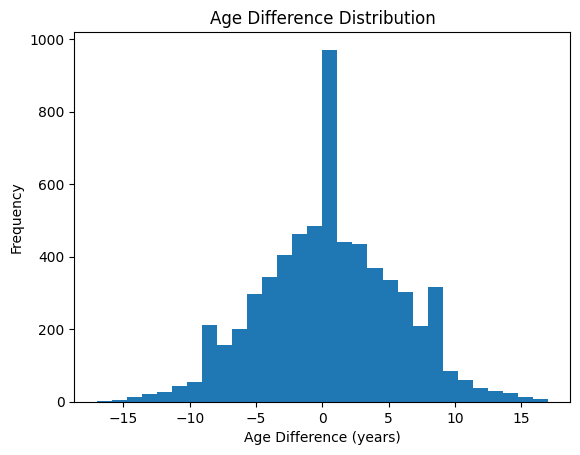

In [1149]:
age_ax = all_fights['Age Difference'].plot(kind='hist',
                                           bins=30,
                                           title='Age Difference Distribution')
age_ax.set_xlabel('Age Difference (years)')

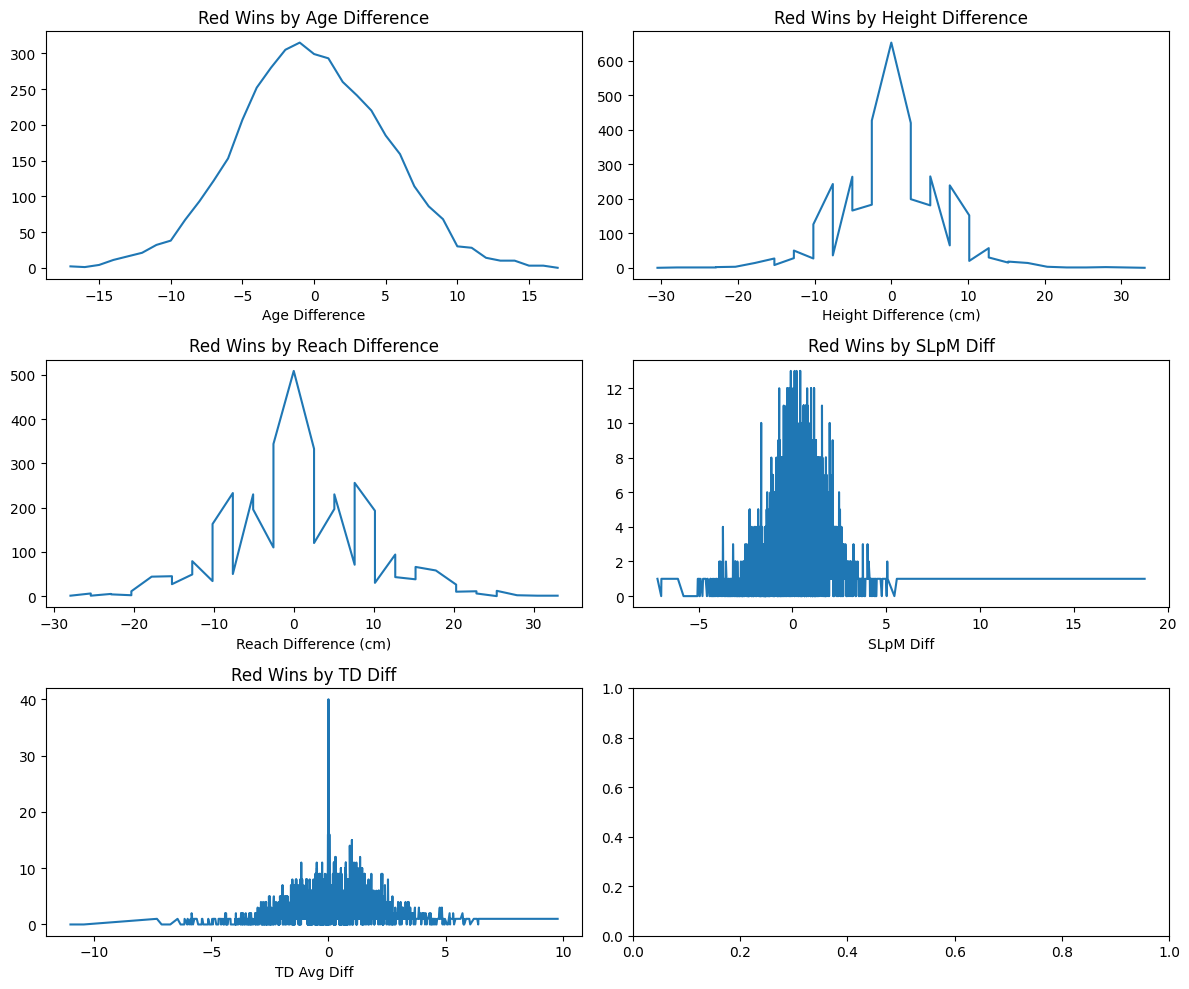

In [1150]:
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

# First plot
all_fights.groupby('Age Difference')['Winner = Red'].sum().plot(ax=axes[0, 0], kind='line', title='Red Wins by Age Difference')

# Second plot
all_fights.groupby('Height Difference (cm)')['Winner = Red'].sum().plot(ax=axes[0, 1], kind='line', title='Red Wins by Height Difference')

# Third plot
all_fights.groupby('Reach Difference (cm)')['Winner = Red'].sum().plot(ax=axes[1, 0], kind='line', title='Red Wins by Reach Difference')

# Fourth plot
all_fights.groupby('SLpM Diff')['Winner = Red'].sum().plot(ax=axes[1, 1], kind='line', title='Red Wins by SLpM Diff')

# Fifth plot
all_fights.groupby('TD Avg Diff')['Winner = Red'].sum().plot(ax=axes[2, 0], kind='line', title='Red Wins by TD Diff')

plt.tight_layout()
plt.show()

In [1151]:

X = all_fights.drop(columns=['Winner = Red', 'Red Fighter', 'Blue Fighter'])
y = all_fights['Winner = Red']

model = RandomForestClassifier()
model.fit(X, y)
importances = pd.Series(model.feature_importances_, index=X.columns)
print(importances.sort_values(ascending=False))

wins_total_diff            0.046486
SLpM Diff                  0.044866
b_SLpM_total               0.036296
SApM Diff                  0.035996
losses_total_diff          0.035495
r_wins_total               0.033280
b_age                      0.032619
Sig Str Acc Diff           0.031101
Age Difference             0.030572
TD Avg Diff                0.028911
b_losses_total             0.028830
TD Def Diff                0.028584
r_SApM_total               0.027505
b_wins_total               0.025642
r_SLpM_total               0.024498
b_SApM_total               0.024440
b_td_def_total             0.024253
TD Acc Diff                0.023864
Str Def Diff               0.023839
r_td_avg                   0.022202
r_losses_total             0.021744
b_td_avg                   0.021425
b_sig_str_acc_total        0.021054
r_str_def_total            0.020651
r_td_def_total             0.020601
r_td_acc_total             0.020472
r_sig_str_acc_total        0.020116
b_td_acc_total             0